# <div><h1 align="center">Predictive analysis of accident severity</h1></div>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#introduction">Introduction</a></li>
        <li><a href="#aboutdataset">About Dataset</a></li>
        <li><a href="#datawrangling">Data Wrangling</a></li>
        <li><a href="#visualization_analysis">Data Visualization and Analysis</a></li>
        <li><a href="#classification">Classification</a></li>
    </ol>
</div>
<br>
<hr>

## <div id="introduction"><h2 > Introduction </h2></div>

The Seattle government is concerned with the severity and number of accidents and wants to employ actions based on the analysis of historical data to alert drivers of the imminence of accidents. This study aims to predict the severity of an accident, given the locations, weather and road conservation. The analysis aims to determine a set of possible causes that contribute to the increase in the severity of accidents to allow preventive actions by road users. The targets audience of the project are drivers, rescue groups, police and insurance companys. It's expected to achieve a reduction in the number and severity of accidents to make drivers and passengers more secure.

## <div id="aboutdataset"><h3 > About dataset </h3></div>

This dataset is about collisions that occurred between 2004 and 2020 in the city of Seattle. The __Data-Collisions.csv__ data set includes details of collisions provided by the Seattle Department of Transportation Traffic Management Division. It includes following fields:

| Field | Description |
| --- | --- |
| OBJECTID | ESRI unique identifier |
| LATITUDE (X) | ESRI geometry field |
| LONGITUDE (Y) | ESRI geometry field |
| ADDRTYPE | Collision address type (Alley/Block/Intersection) |
| SEVERITYCODE | A code that corresponds to the severity of the collision (3 — fatality/2b — serious injury/2—injury/1 — prop damage/0 — unknown) |
| COLLISIONTYPE | Collision type |
| INCDTTM | The date and time of the incident |
| UNDERINFL | Whether or not a driver involved was under the influence of drugs or alcohol |
| WEATHER | A description of the weather conditions during the time of the collision |
| ROADCOND | The condition of the road during the collision |
| LIGHTCOND | The light conditions during the collision |
| SPEEDING | Whether or not speeding was a factor in the collision (Y/N) |

<div><h3> Data Acquisition </h3></div>

Downloading the data set and loading the data from the CSV file

In [1]:
import pandas as pd
url = 'https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv'
df = pd.read_csv(url, low_memory=False)
df.to_csv("Data-Collisions.csv", index=False)

In [2]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214260 non-null  float64
 1   Y                214260 non-null  float64
 2   OBJECTID         221738 non-null  int64  
 3   INCKEY           221738 non-null  int64  
 4   COLDETKEY        221738 non-null  int64  
 5   REPORTNO         221738 non-null  object 
 6   STATUS           221738 non-null  object 
 7   ADDRTYPE         218024 non-null  object 
 8   INTKEY           72027 non-null   float64
 9   LOCATION         217145 non-null  object 
 10  EXCEPTRSNCODE    101335 non-null  object 
 11  EXCEPTRSNDESC    11785 non-null   object 
 12  SEVERITYCODE     221737 non-null  object 
 13  SEVERITYDESC     221738 non-null  object 
 14  COLLISIONTYPE    195287 non-null  object 
 15  PERSONCOUNT      221738 non-null  int64  
 16  PEDCOUNT         221738 non-null  int6

### <div id="datawrangling"><h2>Data Wrangling</h2></div>

In [4]:
import numpy as np

#### Drop unnecessary columns

In [5]:
df.drop(["INCKEY","COLDETKEY","REPORTNO","STATUS","INTKEY","LOCATION","EXCEPTRSNCODE","EXCEPTRSNDESC","SEVERITYDESC","PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT","VEHCOUNT","INJURIES","SERIOUSINJURIES","FATALITIES","INCDATE","JUNCTIONTYPE","SDOT_COLCODE","SDOT_COLDESC","INATTENTIONIND","UNDERINFL","PEDROWNOTGRNT","SDOTCOLNUM","ST_COLCODE","ST_COLDESC","SEGLANEKEY","CROSSWALKKEY","HITPARKEDCAR"], axis=1, inplace=True)

#### Count missing values in each column

In [6]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())

X
False    214260
True       7478
Name: X, dtype: int64
Y
False    214260
True       7478
Name: Y, dtype: int64
OBJECTID
False    221738
Name: OBJECTID, dtype: int64
ADDRTYPE
False    218024
True       3714
Name: ADDRTYPE, dtype: int64
SEVERITYCODE
False    221737
True          1
Name: SEVERITYCODE, dtype: int64
COLLISIONTYPE
False    195287
True      26451
Name: COLLISIONTYPE, dtype: int64
INCDTTM
False    221738
Name: INCDTTM, dtype: int64
WEATHER
False    195097
True      26641
Name: WEATHER, dtype: int64
ROADCOND
False    195178
True      26560
Name: ROADCOND, dtype: int64
LIGHTCOND
False    195008
True      26730
Name: LIGHTCOND, dtype: int64
SPEEDING
True     211802
False      9936
Name: SPEEDING, dtype: int64


#### Drop all rows that do not have data

In [7]:
df = df.dropna(subset=["X","Y","OBJECTID","ADDRTYPE","SEVERITYCODE","COLLISIONTYPE","INCDTTM","WEATHER","ROADCOND","LIGHTCOND"], axis=0)

#### Convert data types to proper format

In [8]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

In [9]:
df['SPEEDING'].fillna('N', inplace=True)

In [10]:
df['ADDRTYPECODE'] = pd.factorize(df.ADDRTYPE)[0]
df['COLLISIONTYPECODE'] = pd.factorize(df.COLLISIONTYPE)[0]
df['WEATHERCODE'] = pd.factorize(df.WEATHER)[0]
df['ROADCONDCODE'] = pd.factorize(df.ROADCOND)[0]
df['LIGHTCONDCODE'] = pd.factorize(df.LIGHTCOND)[0]
df['SPEEDINGCODE'] = pd.factorize(df.SPEEDING)[0]

In [11]:
list1 = ['3','2b','2','1','0']
list2 = ['Fatality','Serious injury','Injury','Prop damage','unknown']
replacement_map = {i1: i2 for i1, i2 in zip(list1, list2)}
df['SEVERITY'] = df['SEVERITYCODE'].map(replacement_map)
list3 = ['3','2b','2','1','0']
list4 = [4,3,2,1,0]
replacement_map = {i1: i2 for i1, i2 in zip(list3, list4)}
df['SEVERITYCODENUM'] = df['SEVERITYCODE'].map(replacement_map)

In [12]:
df['YEARS'] = pd.DatetimeIndex(df['INCDTTM']).year
df['MONTHS'] = pd.DatetimeIndex(df['INCDTTM']).month
df['WEEKDAY'] = pd.DatetimeIndex(df['INCDTTM']).weekday
df['HOUR'] = pd.DatetimeIndex(df['INCDTTM']).time
years = df['YEARS']
years = years.tolist()

In [13]:
df = pd.concat([df, pd.get_dummies(df['SEVERITY'])], axis=1)
df.columns = map(str.upper, df.columns)

In [14]:
df.columns.values

array(['X', 'Y', 'OBJECTID', 'ADDRTYPE', 'SEVERITYCODE', 'COLLISIONTYPE',
       'INCDTTM', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING',
       'ADDRTYPECODE', 'COLLISIONTYPECODE', 'WEATHERCODE', 'ROADCONDCODE',
       'LIGHTCONDCODE', 'SPEEDINGCODE', 'SEVERITY', 'SEVERITYCODENUM',
       'YEARS', 'MONTHS', 'WEEKDAY', 'HOUR', 'FATALITY', 'INJURY',
       'PROP DAMAGE', 'SERIOUS INJURY', 'UNKNOWN'], dtype=object)

### <div id="visualization_analysis"><h2>Data Visualization and Analysis</h2></div>

In [15]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [16]:
df["ADDRTYPE"].value_counts()

Block           123961
Intersection     65600
Name: ADDRTYPE, dtype: int64

<AxesSubplot:>

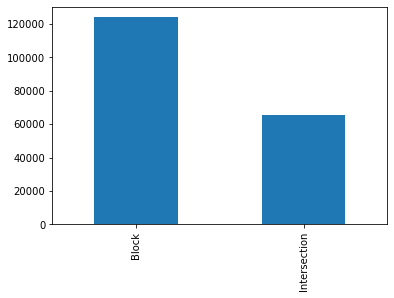

In [17]:
df['ADDRTYPE'].value_counts().plot(kind='bar')

In [18]:
df["SEVERITY"].value_counts()

Prop damage       129499
Injury             56730
Serious injury      2999
Fatality             331
unknown                2
Name: SEVERITY, dtype: int64

<AxesSubplot:>

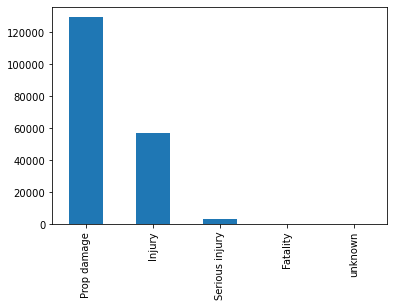

In [19]:
df['SEVERITY'].value_counts().plot(kind='bar')

In [20]:
df["COLLISIONTYPE"].value_counts()

Parked Car    46776
Angles        35317
Rear Ended    33524
Other         23046
Sideswipe     18293
Left Turn     14022
Pedestrian     7585
Cycles         5883
Right Turn     2968
Head On        2147
Name: COLLISIONTYPE, dtype: int64

<AxesSubplot:>

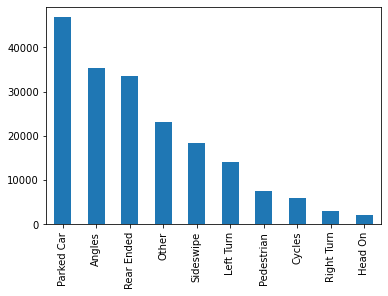

In [21]:
df['COLLISIONTYPE'].value_counts().plot(kind='bar')

In [22]:
df["WEATHER"].value_counts()

Clear                       112433
Raining                      32864
Overcast                     27927
Unknown                      13884
Snowing                        900
Other                          793
Fog/Smog/Smoke                 561
Sleet/Hail/Freezing Rain       115
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                   10
Name: WEATHER, dtype: int64

<AxesSubplot:>

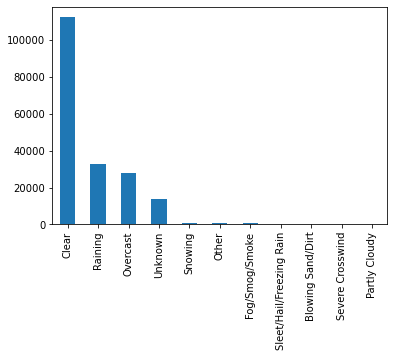

In [23]:
df['WEATHER'].value_counts().plot(kind='bar')

In [24]:
df["ROADCOND"].value_counts()

Dry               125932
Wet                47245
Unknown            13851
Ice                 1195
Snow/Slush           994
Other                120
Standing Water       106
Sand/Mud/Dirt         65
Oil                   53
Name: ROADCOND, dtype: int64

<AxesSubplot:>

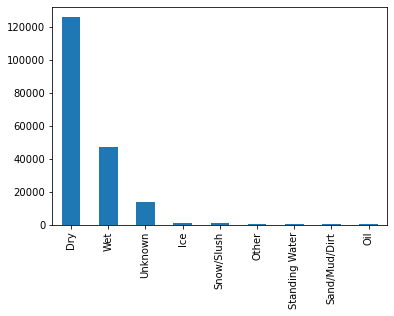

In [25]:
df['ROADCOND'].value_counts().plot(kind='bar')

In [26]:
df["LIGHTCOND"].value_counts()

Daylight                    116884
Dark - Street Lights On      48840
Unknown                      12474
Dusk                          5942
Dawn                          2525
Dark - No Street Lights       1492
Dark - Street Lights Off      1185
Other                          195
Dark - Unknown Lighting         24
Name: LIGHTCOND, dtype: int64

<AxesSubplot:>

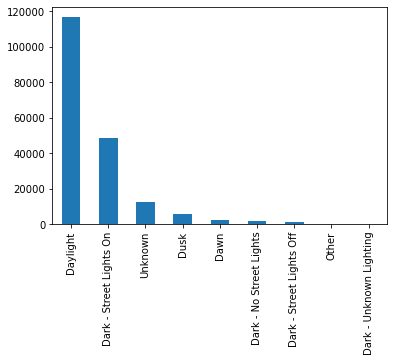

In [27]:
df['LIGHTCOND'].value_counts().plot(kind='bar')

In [28]:
df["SPEEDING"].value_counts()

N    180271
Y      9290
Name: SPEEDING, dtype: int64

<AxesSubplot:>

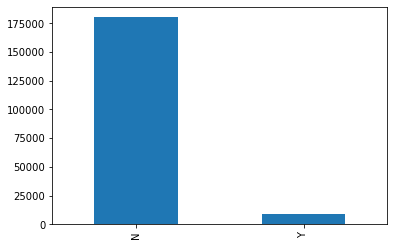

In [29]:
df['SPEEDING'].value_counts().plot(kind='bar')

In [30]:
df[['ADDRTYPECODE','COLLISIONTYPECODE','WEATHERCODE','ROADCONDCODE','LIGHTCONDCODE','SPEEDINGCODE','FATALITY','SERIOUS INJURY',
    'INJURY']].corr()

,ADDRTYPECODE,COLLISIONTYPECODE,WEATHERCODE,ROADCONDCODE,LIGHTCONDCODE,SPEEDINGCODE,FATALITY,SERIOUS INJURY,INJURY
ADDRTYPECODE,1.000000,0.242859,0.085995,0.113349,0.086780,0.058708,-0.009948,-0.044538,-0.193674
COLLISIONTYPECODE,0.242859,1.000000,0.075280,0.096692,0.109841,-0.037295,-0.005615,-0.017902,-0.237198
WEATHERCODE,0.085995,0.075280,1.000000,0.658142,0.279622,0.022704,-0.004702,-0.024438,-0.095990
ROADCONDCODE,0.113349,0.096692,0.658142,1.000000,0.333520,0.042018,-0.013347,-0.028095,-0.121714
LIGHTCONDCODE,0.086780,0.109841,0.279622,0.333520,1.000000,0.044146,0.005350,0.003271,-0.092071
SPEEDINGCODE,0.058708,-0.037295,0.022704,0.042018,0.044146,1.000000,0.039670,0.042892,0.031258
FATALITY,-0.009948,-0.005615,-0.004702,-0.013347,0.005350,0.039670,1.000000,-0.005303,-0.027332
SERIOUS INJURY,-0.044538,-0.017902,-0.024438,-0.028095,0.003271,0.042892,-0.005303,1.000000,-0.082858
INJURY,-0.193674,-0.237198,-0.095990,-0.121714,-0.092071,0.031258,-0.027332,-0.082858,1.000000


In [31]:
df_years_severity = df.groupby(years)['FATALITY','SERIOUS INJURY'].sum()
df_years_severity

<ipython-input-31-abc99a7db019>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_years_severity = df.groupby(years)['FATALITY','SERIOUS INJURY'].sum()


,FATALITY,SERIOUS INJURY
2004,30.0,213.0
2005,27.0,202.0
2006,33.0,285.0
2007,14.0,239.0
2008,20.0,191.0
2009,24.0,198.0
2010,16.0,172.0
2011,10.0,140.0
2012,18.0,174.0
2013,21.0,157.0


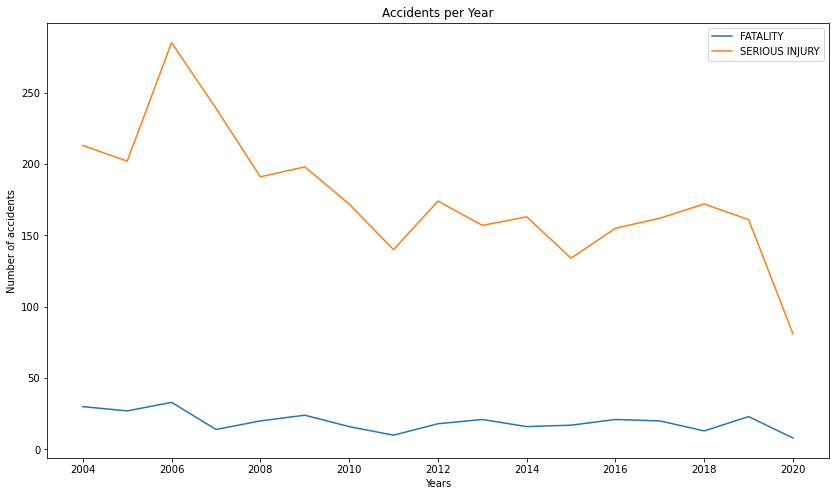

In [32]:
df_years_severity.plot(kind='line', figsize=(14, 8))
plt.title('Accidents per Year')
plt.ylabel('Number of accidents')
plt.xlabel('Years')
plt.show() # need this line to show the updates made to the figure

In [33]:
df['DATE'] = df['INCDTTM'].dt.date
date = df[['OBJECTID','SEVERITYCODE', 'DATE']]
date_severity = date[date.SEVERITYCODE.isin(['3','2b','2'])]

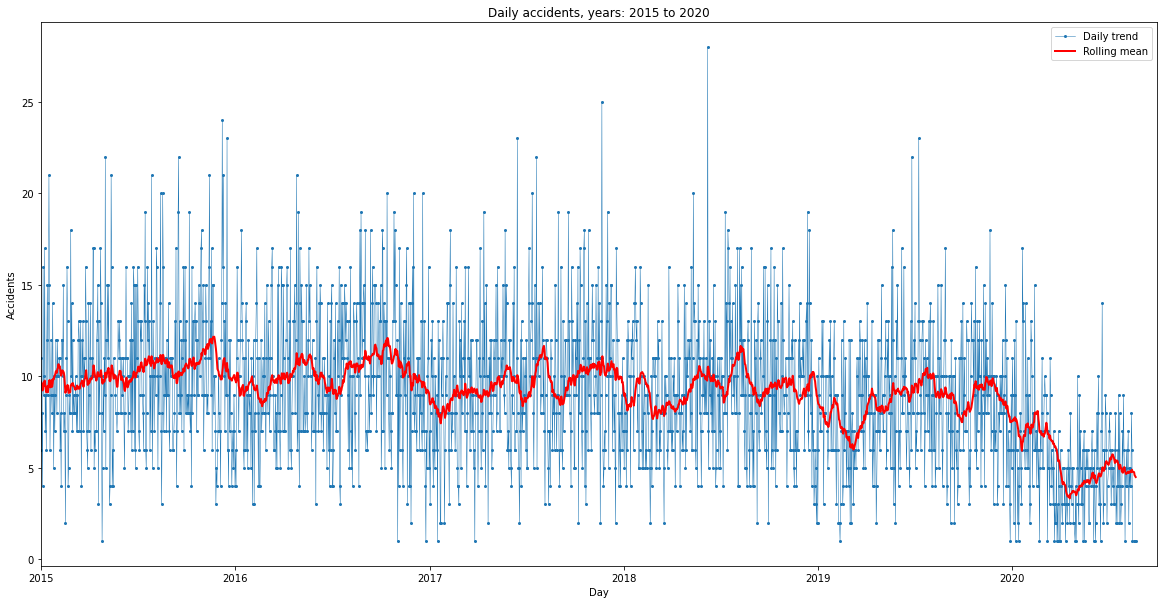

In [34]:
season = date_severity[['DATE', 'OBJECTID']].groupby('DATE').count()
season['rolling'] = season.OBJECTID.rolling(window=30).mean()
season['OBJECTID'][365*8:].plot(figsize=(20,10), marker='o', markersize=2, linewidth=0.5, label='Daily trend')
season['rolling'][365*8:].plot(color='r', linewidth=2, label='Rolling mean')
plt.title('Daily accidents, years: 2015 to 2020')
plt.xlabel('Day')
plt.ylabel('Accidents')

t0 = dt.datetime.strptime('2015-01-01', '%Y-%m-%d')
t1 = dt.datetime.strptime('2020-09-30', '%Y-%m-%d')

plt.xlim(t0,t1)
plt.legend()
plt.show()

In [35]:
df['MONTHS'] = pd.DatetimeIndex(df['INCDTTM']).month
date_month = df[['OBJECTID','SEVERITYCODE', 'MONTHS']]
date_severity_month = date_month[date.SEVERITYCODE.isin(['3','2b','2'])]

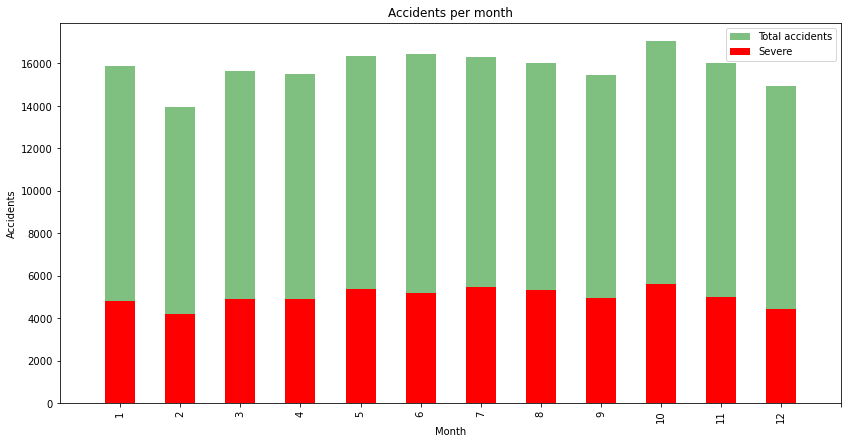

In [36]:
monthly = date_month[['MONTHS', 'OBJECTID']].groupby(['MONTHS']).count()
monthly['SEVERITYCODE'] = date_severity_month[['MONTHS', 'OBJECTID']].groupby(['MONTHS']).count()
monthly['OBJECTID'].plot.bar(figsize=(14,7), alpha=0.5, color='g', label='Total accidents')
monthly['SEVERITYCODE'].plot.bar(color='r', label='Severe')
plt.title('Accidents per month')
plt.xticks(range(13))
plt.xlim(-1,12)
plt.xlabel('Month')
plt.ylabel('Accidents')
plt.legend()

In [37]:
df['HOUR'] = df['HOUR'].apply(lambda x: x.replace(minute=0, second=0))
date_hour = df[['OBJECTID','SEVERITYCODE', 'HOUR']]
date_severity_hour = date_hour[date.SEVERITYCODE.isin(['3','2b','2'])]

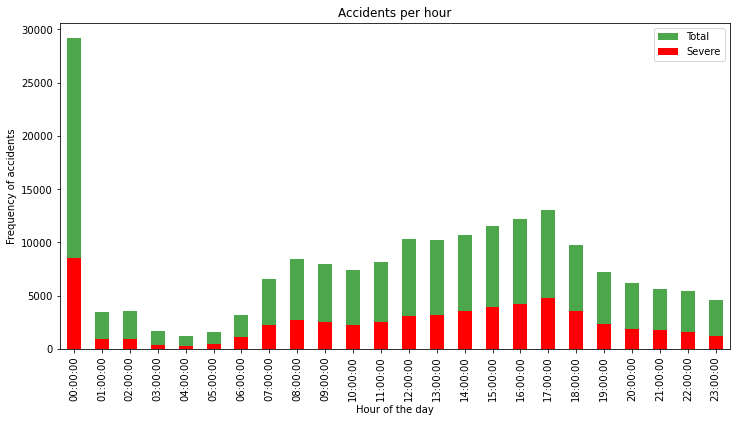

In [38]:
hourly = df[['OBJECTID', 'HOUR']].groupby('HOUR').count()

hourly['SEVERITYCODE'] = df[df.SEVERITYCODE.isin(['3','2b','2'])][['OBJECTID', 'HOUR']].groupby('HOUR').count()
hourly['SEVERITYCODE']
hourly['OBJECTID'].plot.bar(figsize=(12,6), alpha=0.7, color='g', label='Total')
hourly['SEVERITYCODE'].plot.bar(color='r', label='Severe')
plt.xticks(range(24))
plt.title('Accidents per hour')
plt.xlabel('Hour of the day')
plt.ylabel('Frequency of accidents')
plt.legend()
# df.time.value_counts()
# hourly.ID.value_counts()
#hourly['ID'].sum()

#### Comparing the trend of serious injuries or fatalities in the line graph

In [39]:
import folium
from folium import plugins

#### Superimposing the location of accidents on the map

In [40]:
avg_longitude = df["X"].astype("float").mean(axis=0)
avg_latitude = df["Y"].astype("float").mean(axis=0)
df_incidents = df.dropna(subset=["X", "Y"], axis=0)
df_incidents_graves = df_incidents.loc[df_incidents['SEVERITYCODE'] == '3']

In [41]:
df_incidents_graves

,X,Y,OBJECTID,ADDRTYPE,SEVERITYCODE,COLLISIONTYPE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,...,YEARS,MONTHS,WEEKDAY,HOUR,FATALITY,INJURY,PROP DAMAGE,SERIOUS INJURY,UNKNOWN,DATE
965,-122.337486,47.589746,966,Block,3,Other,2005-04-10 21:51:00,Raining,Wet,Dark - Street Lights On,...,2005,4,6,21:00:00,1,0,0,0,0,2005-04-10
2570,-122.388861,47.668674,2571,Block,3,Head On,2016-11-10 19:57:00,Clear,Dry,Dark - Street Lights On,...,2016,11,3,19:00:00,1,0,0,0,0,2016-11-10
2710,-122.276741,47.547432,2711,Block,3,Pedestrian,2004-10-05 00:00:00,Overcast,Dry,Daylight,...,2004,10,1,00:00:00,1,0,0,0,0,2004-10-05
3389,-122.342913,47.690550,3390,Block,3,Pedestrian,2004-02-28 01:52:00,Clear,Dry,Dark - Street Lights On,...,2004,2,5,01:00:00,1,0,0,0,0,2004-02-28
3660,-122.347322,47.663939,3661,Block,3,Other,2004-08-16 18:08:00,Clear,Dry,Daylight,...,2004,8,0,18:00:00,1,0,0,0,0,2004-08-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220034,-122.367932,47.521030,220035,Block,3,Pedestrian,2019-07-03 09:22:00,Overcast,Dry,Daylight,...,2019,7,2,09:00:00,1,0,0,0,0,2019-07-03
220439,-122.296188,47.578347,220440,Intersection,3,Left Turn,2019-06-25 20:26:00,Clear,Dry,Daylight,...,2019,6,1,20:00:00,1,0,0,0,0,2019-06-25
220491,-122.290479,47.683048,220492,Intersection,3,Left Turn,2019-06-10 17:13:00,Clear,Dry,Daylight,...,2019,6,0,17:00:00,1,0,0,0,0,2019-06-10
221197,-122.293240,47.560808,221198,Intersection,3,Angles,2019-08-06 07:35:00,Clear,Dry,Daylight,...,2019,8,1,07:00:00,1,0,0,0,0,2019-08-06


In [42]:
# define the world map
world_map = folium.Map(location=[round(avg_latitude, 2), round(avg_longitude, 2)], zoom_start=10, tiles='OpenStreetMap')

# instantiate a feature group for the incidents in the dataframe
# incidents = folium.map.FeatureGroup()
incidents = plugins.MarkerCluster().add_to(world_map)

for lat, lng, label in zip(df_incidents_graves.Y, df_incidents_graves.X, df_incidents_graves.SEVERITY):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
world_map

<div id="classification"><h2>Classification</h2></div>

## K-Nearest Neighbors algorithm

In [43]:
import itertools
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [44]:
df[['SEVERITYCODENUM','WEATHERCODE','ROADCONDCODE','LIGHTCONDCODE','SPEEDING','ADDRTYPECODE','COLLISIONTYPECODE']]

,SEVERITYCODENUM,WEATHERCODE,ROADCONDCODE,LIGHTCONDCODE,SPEEDING,ADDRTYPECODE,COLLISIONTYPECODE
0,1,0,0,0,N,0,0
1,1,1,1,1,N,1,1
2,2,0,0,2,N,1,2
3,2,1,1,2,N,0,3
4,2,0,2,2,Y,1,4
...,...,...,...,...,...,...,...
221732,2,0,0,2,N,1,1
221734,1,0,0,0,N,1,8
221735,2,0,0,0,N,0,0
221736,2,0,0,0,Y,0,0


The following characteristics of the dataset will be used to make the predictions
1. WEATHER;
2. ROADCOND;
3. LIGHTCOND;
4. SPEEDING;
5. ADDRTYPE;
6. COLLISIONTYPE.

In [45]:
df = df.dropna(subset=['SEVERITYCODENUM','WEATHERCODE','ROADCONDCODE','LIGHTCONDCODE','SPEEDING','ADDRTYPECODE','COLLISIONTYPECODE'], axis=0)

In [46]:
df.shape

(189561, 29)

### Define feature sets

In [47]:
X = df[['ADDRTYPECODE','COLLISIONTYPECODE','WEATHERCODE','ROADCONDCODE','LIGHTCONDCODE','SPEEDINGCODE']]
X[0:5]

,ADDRTYPECODE,COLLISIONTYPECODE,WEATHERCODE,ROADCONDCODE,LIGHTCONDCODE,SPEEDINGCODE
0,0,0,0,0,0,0
1,1,1,1,1,1,0
2,1,2,0,0,2,0
3,0,3,1,1,2,0
4,1,4,0,2,2,1


Our label

In [48]:
y = df['SEVERITYCODENUM'].values
y[0:5]

array([1, 1, 2, 2, 2], dtype=int64)

### Normalize Data

In [49]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-1.37464519, -1.34727444, -0.68066926, -0.56541594, -0.69178723,
        -0.22700997],
       [ 0.72746045, -0.99934873,  0.21926061,  0.53621327,  0.08121906,
        -0.22700997],
       [ 0.72746045, -0.65142303, -0.68066926, -0.56541594,  0.85422536,
        -0.22700997],
       [-1.37464519, -0.30349732,  0.21926061,  0.53621327,  0.85422536,
        -0.22700997],
       [ 0.72746045,  0.04442839, -0.68066926,  1.63784248,  0.85422536,
         4.40509295]])

### Train Test Split

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (151648, 6) (151648,)
Test set: (37913, 6) (37913,)


### Classification
K nearest neighbor (KNN)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

### Training

In [52]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.66172553, 0.68873473, 0.67151109, 0.69369346, 0.68026798,
       0.70888613, 0.70458682, 0.71959486, 0.71329096])

#### Plot  model accuracy  for Different number of Neighbors

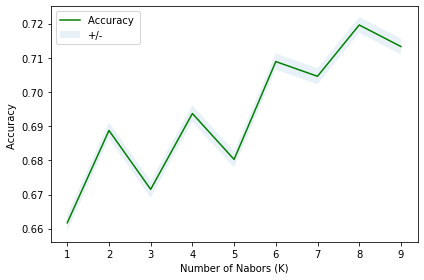

In [53]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/-'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [54]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7195948619207132 with k= 8


In [55]:
k = 8
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=8)

### Predicting

In [56]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 1, 1, 2], dtype=int64)

### Accuracy evaluation

In [57]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.7268015404093691
Test set Accuracy:  0.7195948619207132


### Discussion of results

The positive correlation found in the SPEEDING and LIGHTCOND variables as a function of the severity of accidents indicates the need to maintain the conservation and lighting of the roads.

For this problem precision means the % of predicted severe accidents that were truly severe. 

The use of a machine learning model for predicting the severity of an automobile accident reached an accuracy around of  0.726 for the training set and 0.719 for the test set.

### Conclusion

From the analysis of the information obtained from the Seattle Department of Transportation Traffic Management Division we can conclude that the weather conditions, the state of conservation of roads, the lighting and the speed of traffic can have an aggravating impact in the case of automobile accidents.